# Sage

Sage (o sagemath) es un programa libre cuyo objetivo es ser una alternativa abierta programas como Maple, mathematica, etc.

Una de las filosofías de sage es ser como un "pegamento" entre varios programas de matemáticas que había flotando en el internet. Usa python como pegamento: todo lo que puedes hacer en python también lo puedes hacer en sage, pero sage trae más cosas para manejar matemáticas.

## Documentación

La documentación de sage es muy buena. Siempre trae ejemplos de todo. Se llama con ?

In [26]:
prime_divisors?

Signature:      prime_divisors(n)
Docstring:     
   Return the list of prime divisors (up to units) of this element of
   a unique factorization domain.

   INPUT:

   * "n" -- any object which can be decomposed into prime factors

   OUTPUT:

   A list of prime factors of "n". For integers, this list is sorted
   in increasing order.

   EXAMPLES:

   Prime divisors of positive integers:

      sage: prime_divisors(1)
      []
      sage: prime_divisors(100)
      [2, 5]
      sage: prime_divisors(2004)
      [2, 3, 167]

   If "n" is negative, we do *not* include -1 among the prime
   divisors, since -1 is not a prime number:

      sage: prime_divisors(-100)
      [2, 5]

   For polynomials we get all irreducible factors:

      sage: R.<x> = PolynomialRing(QQ)
      sage: prime_divisors(x^12 - 1)
      [x - 1, x + 1, x^2 - x + 1, x^2 + 1, x^2 + x + 1, x^4 - x^2 + 1]

   Tests with numpy and gmpy2 numbers:

      sage: from numpy import int8
      sage: prime_divisors(int8(-100))
 

In [28]:
prime_divisors(2020)

[2, 5, 101]

In [31]:
factor(2020)

2^2 * 5 * 101

## Variables simbólicas

Podemos declarar variables simbólicas así:

In [1]:
var('x')

x

In [2]:
x

x

In [3]:
var('y')

y

In [5]:
var('x y z')

(x, y, z)

In [7]:
x**2 + 2*y-z

x^2 + 2*y - z

Lo anterior es una expresión simbólica.

In [9]:
expr = x**2+y

In [10]:
expr

x^2 + y

In [11]:
f(x,y) = x**2+y

In [12]:
f

(x, y) |--> x^2 + y

In [13]:
f(x,y)

x^2 + y

In [15]:
f(z,3)

z^2 + 3

In [16]:
type(expr)

<class 'sage.symbolic.expression.Expression'>

In [17]:
type(f)

<class 'sage.symbolic.expression.Expression'>

In [20]:
f(3,5)

14

También tenemos ecuaciones:

In [182]:
x==3

x == 3

Noten que no me respondió "False". Más bien, como x es una expresión, decidió que era una ecuación lo anterior. Igual con <,>, etc.

In [184]:
x < 3

x < 3

## solve

Obviamente sage sabe resolver ecuaciones, sistemas de ecuaciones, etc.

In [180]:
solve(x**2+2*x-4 == 0,x)

[x == -sqrt(5) - 1, x == sqrt(5) - 1]

In [185]:
solutions = solve(x**2+2*x-4 == 0,x)

In [187]:
solutions[0].rhs()

-sqrt(5) - 1

In [189]:
solve([x+y==8,x*y==15],(x,y))

[[x == 5, y == 3], [x == 3, y == 5]]

In [192]:
solve(x^2>9, x)

[[x < -3], [x > 3]]

## Plot

Uno de los comandos más completos que trae sage es "plot". Puede hacer básicamente lo que quieras y es muy sencillo de usar.

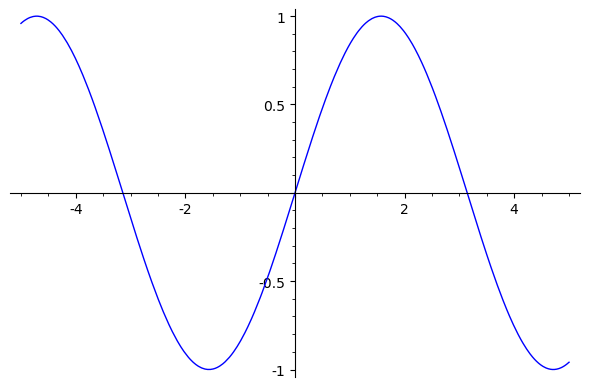

In [39]:
plot(sin(x),x,-5,5)

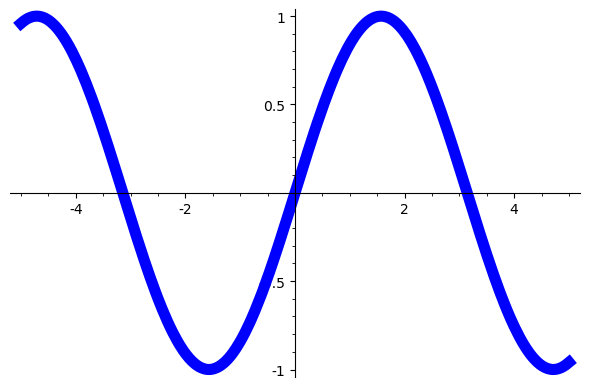

In [44]:
plot(sin(x),x,-5,5,thickness=8)

Puedes graficar una lista:

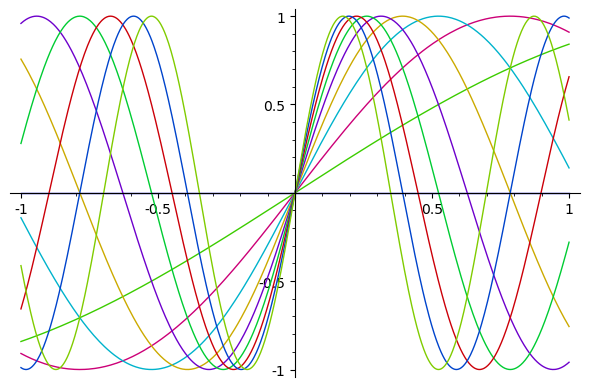

In [51]:
plot([sin(i*x) for i in range(10)],x,-1,1)

Otra manera en donde tienes más control es "sumar" plots (i.e. graficar juntos)

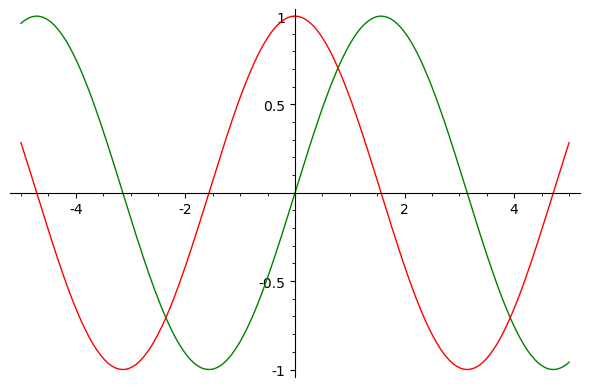

In [42]:
plot(sin(x),x,-5,5,color="green") + plot(cos(x),-5,5,color="red")

In [52]:
P = plot(sin(x),x,-5,5)

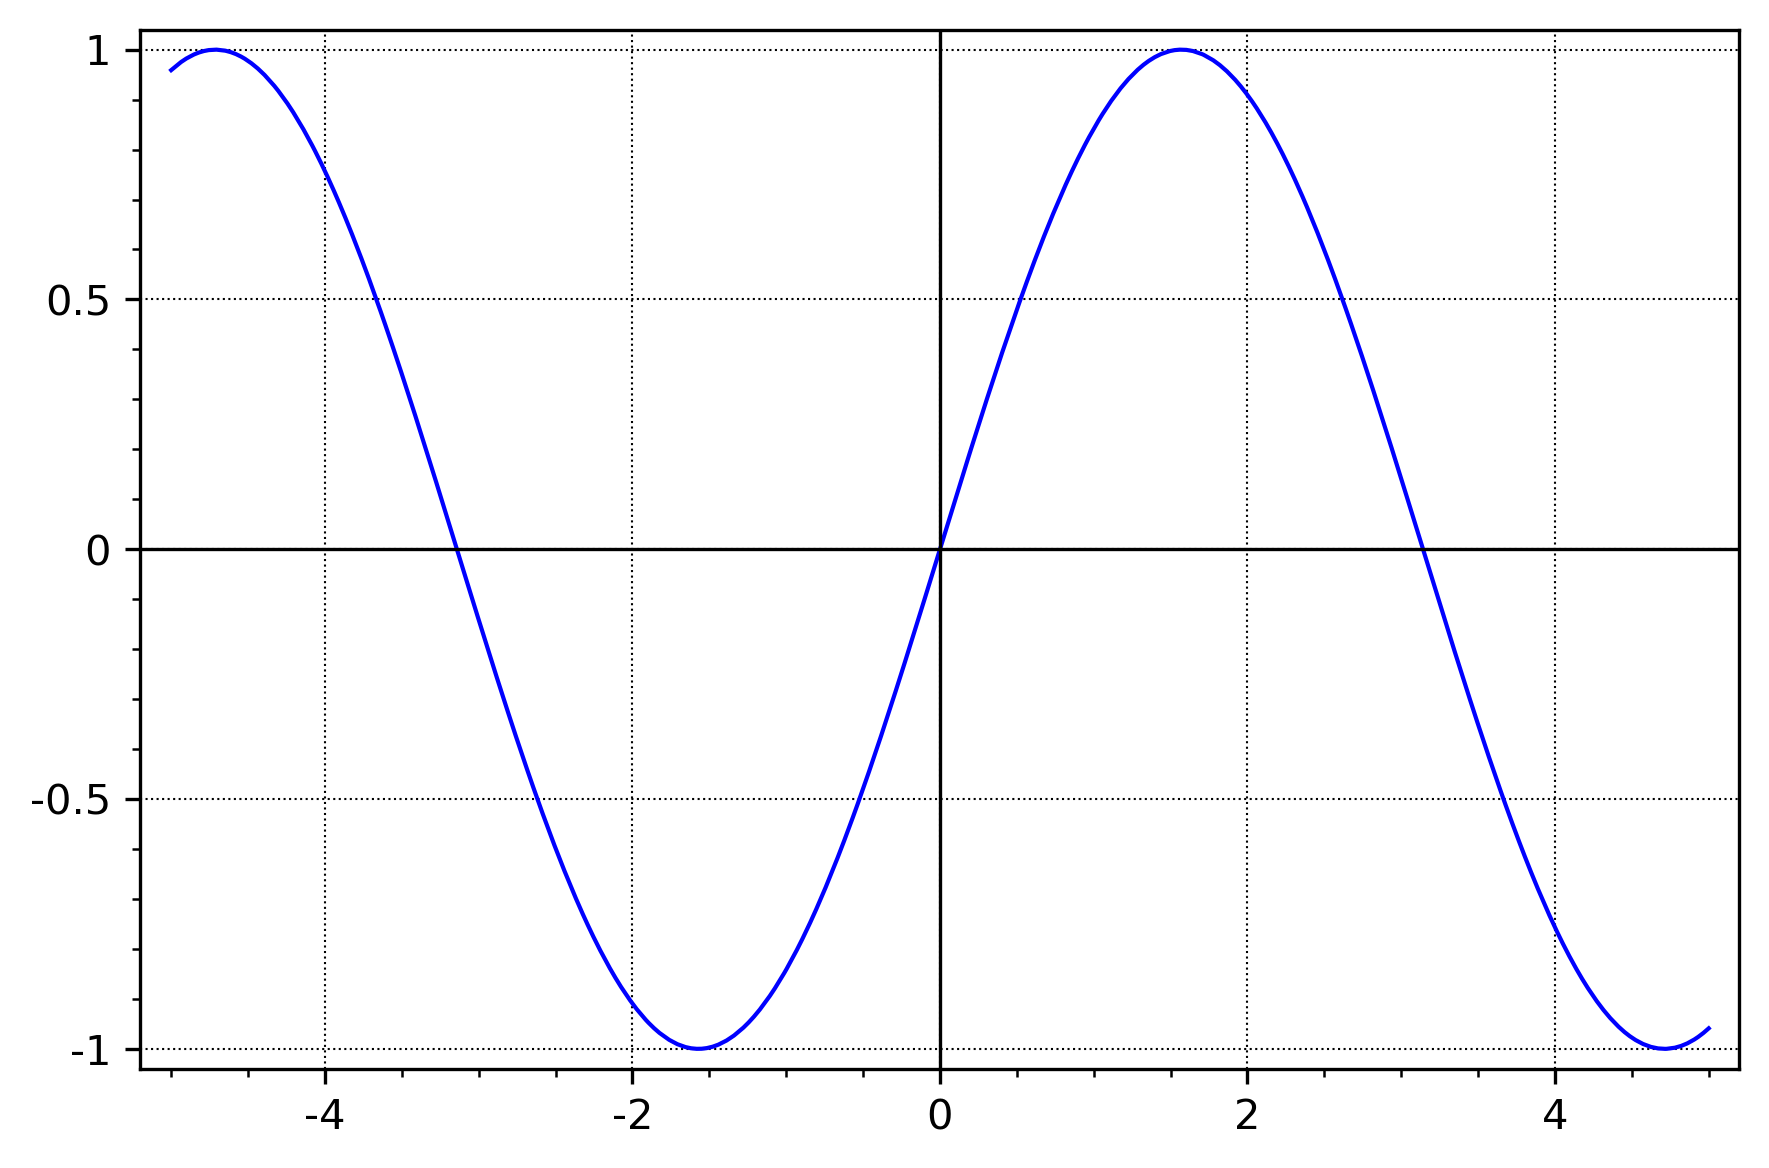

In [56]:
P.show(dpi=300,frame=True,gridlines=True)

O en 3 dimensiones...

In [98]:
plot3d(x^2 + y^2, (-2,2), (-2,2))

Graphics3d Object

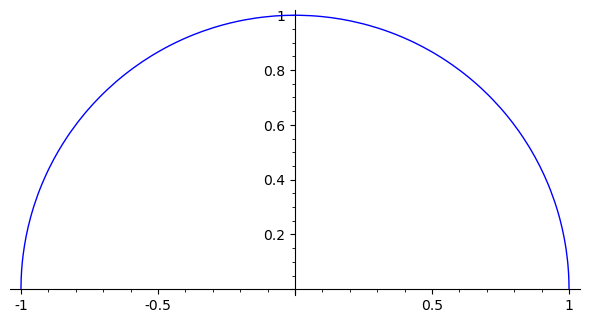

In [177]:
var('t')
parametric_plot( (cos(t), sin(t)), (t, 0, pi))

Puedes graficar "implícitamente" también (es decir, graficar $\{(x,y) : f(x,y)=0\}$):

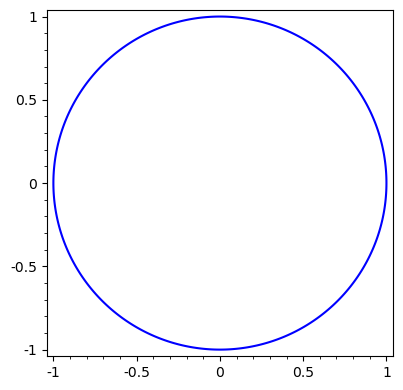

In [95]:
implicit_plot(x**2+y**2-1,xrange=(-1,1),yrange=(-1,1))

### Figuras geométricas

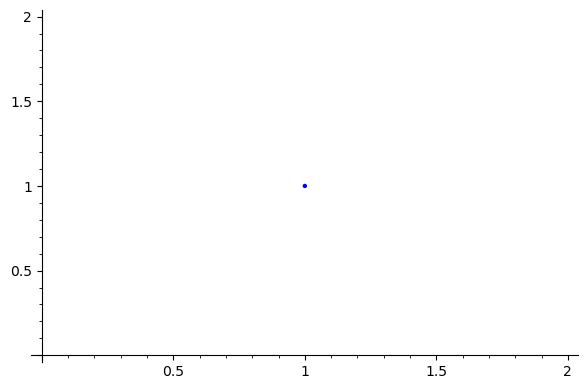

In [76]:
point2d((1,1))

In [78]:
import random

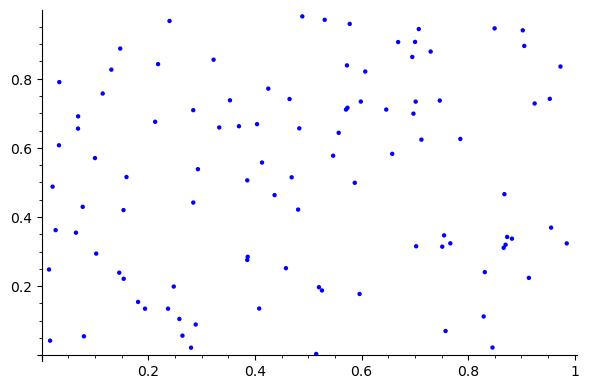

In [80]:
sum([point2d((random.random(), random.random())) for _ in range(100)])

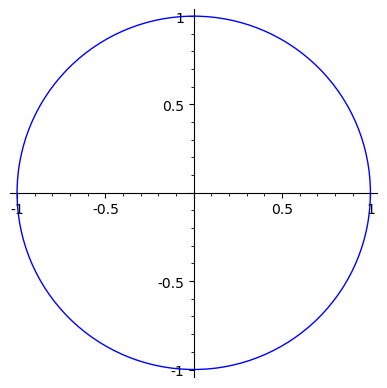

In [62]:
circle((0,0),1)

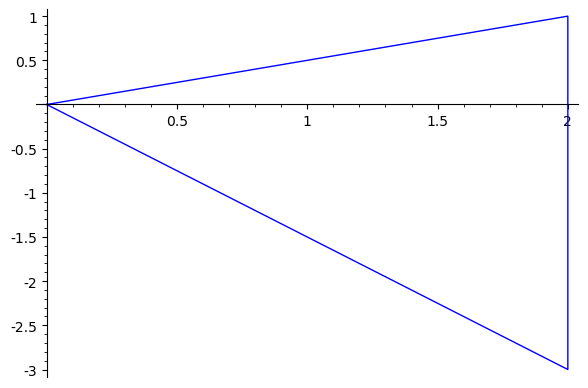

In [71]:
line2d([(0,0),(2,1),(2,-3),(0,0)])

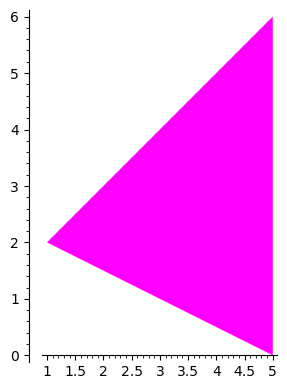

In [72]:
polygon2d([[1,2], [5,6], [5,0]], rgbcolor=(1,0,1))

### Ejercicios

1. Dibuja un triángulo cuyo borde sea azul y cuyo interior sea verde.
2. Dada $n\in\mathbb{N}$, dibuja un $n$-ágono regular (que no haya ejes).
3. (opcional) Crea arte con círculos, polígonos, etc.


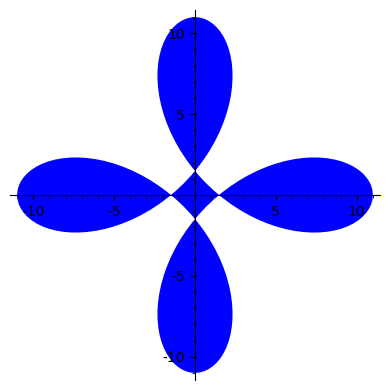

In [170]:
# De los ejemplos de sage:
L = [[6*cos(pi*i/100)+5*cos((6/2)*pi*i/100),6*sin(pi*i/100)-5*sin((6/2)*pi*i/100)] for i in range(200)]
polygon(L)

## Cálculo 

In [35]:
derivative(x**5,x)

5*x^4

In [36]:
integral(x**5,x)

1/6*x^6

In [81]:
F(x) = x**3 - 2*x**2 + 1
f = derivative(F)

In [84]:
f

x |--> 3*x^2 - 4*x

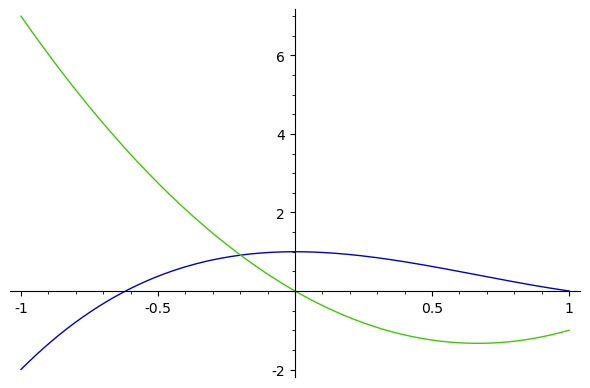

In [83]:
plot([F,f])

### Ejercicios

1. Crea una función que tome como parámetros una función (diferenciable) $f$ y un valor $x\in\mathbb{R}$. Después dibuja la función y la recta tangente a la gráfica que pasa por $(x,f(x))$.
2. Dada una función $f$ en un intervalo $[a,b]$, dibuja la aproximación de Riemmann de la integral. Algo así pues: 

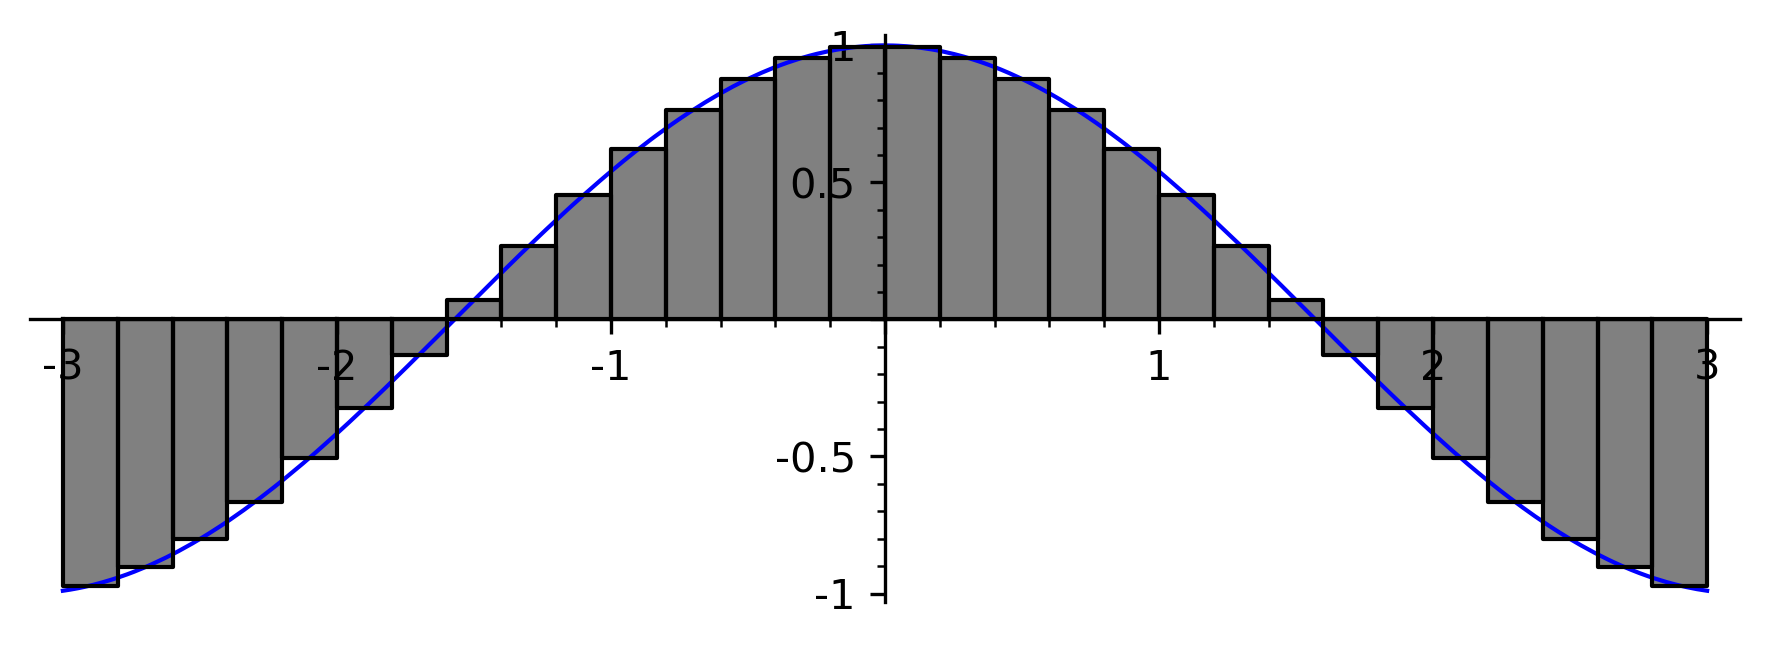

In [20]:
riemmann(cos,-3,3,30).show(dpi=300)

3. Dada una función $f$ y un punto $x$, grafica las aproximaciones de Taylor de órdenes 0,1,2,3,4. (Hint: usa la función "taylor" (e.g. `taylor(cos(x),x,0,6)`). Para pto extra: programa taylor.)
4. Juega un rato con plot. Lee las instrucciones. Corre los ejemplos. Se feliz.